### Linear Regression Task

**Task 01:**  
Your objective is to manually compute the slope (M) and y-intercept (C) using Ordinary Least Squares Linear Regression. Once determined, apply these values to predict the price when the vegetable weight is 6.

**Task 02:**  
Compute the residuals for each data point.

**Task 03:**  
Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

**Final Task:**  
Generate an Excel file for the given dataset. Utilize Python for all the calculations.

**Dataset Table:**

| Weight | Price |
|--------|-------|
| 2      | 35    |
| 4      | 60    |
| 5      | 20    |
| 3      | 50    |
| 6      | 50    |
| 5      | 55    |
| 7      | 60    |

**Note:** To validate your manual calculations, use the entire dataset. It's unnecessary to split the dataset.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {
    'Weight': [2,4,5,3,6,5,7],
    'Price': [35,60,20,50,50,55,60]
}
df = pd.DataFrame(data)
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


**Task 01:**

In [3]:
x = df['Weight']
y = df['Price']

mean_x = np.mean(x)
mean_y = np.mean(y)
print(f"Mean of x is: {mean_x}")
print(f"Mean of y is: {mean_y}")
df['Mean of x'] = mean_x
df['Mean of y'] = mean_y
df

Mean of x is: 4.571428571428571
Mean of y is: 47.142857142857146


,Weight,Price,Mean of x,Mean of y
0,2,35,4.571429,47.142857
1,4,60,4.571429,47.142857
2,5,20,4.571429,47.142857
3,3,50,4.571429,47.142857
4,6,50,4.571429,47.142857
5,5,55,4.571429,47.142857
6,7,60,4.571429,47.142857


In [5]:
dev_x = x - mean_x
dev_y = y - mean_y
df["Deviation of x"] =dev_x
df["Deviation of y"] =dev_y
df["Deviation of x²"] =dev_x**2
df["Dev_x * Dev_y"] = dev_x*dev_y

df

,Weight,Price,Mean of x,Mean of y,Deviation of x,Deviation of y,Deviation of x²,Dev_x * Dev_y
0,2,35,4.571429,47.142857,-2.571429,-12.142857,6.612245,31.224490
1,4,60,4.571429,47.142857,-0.571429,12.857143,0.326531,-7.346939
2,5,20,4.571429,47.142857,0.428571,-27.142857,0.183673,-11.632653
3,3,50,4.571429,47.142857,-1.571429,2.857143,2.469388,-4.489796
4,6,50,4.571429,47.142857,1.428571,2.857143,2.040816,4.081633
5,5,55,4.571429,47.142857,0.428571,7.857143,0.183673,3.367347
6,7,60,4.571429,47.142857,2.428571,12.857143,5.897959,31.224490


In [6]:
dev_x2 = df["Deviation of x²"]
dev_x_X_dev_y = df["Dev_x * Dev_y"]
print("Sum of dev_x * dev_y = ",np.sum(dev_x_X_dev_y))
print("Sum of dev_x² = ",np.sum(dev_x2))

Sum of dev_x * dev_y =  46.42857142857143
Sum of dev_x² =  17.714285714285715


In [7]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)
c = mean_y - (m*mean_x)
print("m is: ",m)
print("c is: ",c)
print(f"Equation is: y = {m:.2f}x + {c:.2f}")

m is:  2.620967741935484
c is:  35.16129032258065
Equation is: y = 2.62x + 35.16


In [8]:
print("Price of vegetable when weight is 6 is: ", m*6+c)

Price of vegetable when weight is 6 is:  50.88709677419355


**Task 2**

In [9]:
predicted_prices = m*x+c
residuals = y - predicted_prices
df2 = pd.DataFrame(data)
df2['Predicted prices']= predicted_prices
df2['Residuals'] = residuals
df2

,Weight,Price,Predicted prices,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


**Task 3**

In [10]:
n = len(x)
mse = (np.sum((y-predicted_prices)**2))/n
mae = (np.sum(abs(y-predicted_prices)))/n
print(f"MEAN Squred Error is: {mse}")
print(f"MEAN Absolute Error is: {mae}")
#shortcut
# MSE = np.mean(residuals ** 2)
# MAE = np.mean(np.abs(residuals))

MEAN Squred Error is: 167.30990783410135
MEAN Absolute Error is: 9.87327188940092


**Final Task**

In [6]:
df3 = pd.DataFrame(data)
df3.to_excel('LR_Dataset.xlsx', index=False)

In [16]:
df3.corr()
#This correlation is not suitable for linear Regression
#It is more suitable for near to 1. But here it is 0.3

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


In [7]:
reg = LinearRegression()
reg.fit(df3[['Weight']] , df3['Price']) # x have to be 2D

LinearRegression()

In [18]:
reg.coef_

array([2.62096774])

In [19]:
reg.intercept_
#They are same to manual m and c

35.16129032258065

In [24]:
reg.predict([[6]])

array([50.88709677])

In [25]:
df3['Predicted Price'] = reg.predict(df3[['Weight']])
df3

,Weight,Price,Predicted Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [26]:
df3['Residuals'] = df3['Price'] - df3['Predicted Price']
df3

,Weight,Price,Predicted Price,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [27]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error

In [29]:
sk_mse = mean_squared_error(df3[['Predicted Price']], df3[['Price']])
sk_mae = mean_absolute_error(df3[['Predicted Price']], df3[['Price']])
print(f"MEAN Squred Error is: {sk_mse}")
print(f"MEAN Absolute Error is: {sk_mae}")

MEAN Squred Error is: 167.30990783410135
MEAN Absolute Error is: 9.87327188940092


**Display**

In [31]:
df3

,Weight,Price,Predicted Price,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


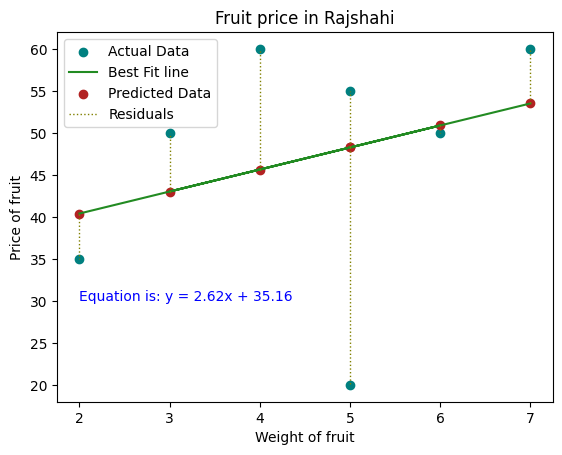

In [83]:
plt.scatter(df3['Weight'], df3['Price'], label = 'Actual Data', color = 'teal')
plt.plot(df3['Weight'], df3['Predicted Price'], label = 'Best Fit line', color = 'forestgreen')
plt.scatter(df3['Weight'], df3['Predicted Price'], label = 'Predicted Data', c = 'firebrick')
plt.vlines(df3['Weight'], df3['Predicted Price'], df3['Price'], colors='olive', linestyles=":", linewidth=1, label='Residuals')

plt.xlabel('Weight of fruit')
plt.ylabel('Price of fruit')
plt.title('Fruit price in Rajshahi')

plt.text(2, 30, f"Equation is: y = {m:.2f}x + {c:.2f}", fontsize=10, color='b')

plt.legend()
plt.show()